Select a dataset with a continuous target variable.

Be sure your data is prepared (no missing values, numeric datatypes) and split into samples.

Work through all of the steps outlined in the lesson, from setting the baseline to selected a model and evaluating the final model on your test data.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from pydataset import data

import warnings
warnings.filterwarnings("ignore")

import feature_engieering as fe

In [4]:
swiss_df= data('swiss')

In [5]:
swiss_df.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [6]:
target = 'Fertility'

In [10]:
X_train, y_train, X_validate, y_validate, X_test, y_test = fe.train_validate_test(swiss_df, target)

In [12]:
obj_cols = fe.get_object_cols(X_train)

In [13]:
num_cols = fe.get_numeric_X_cols(X_train, obj_cols)

In [14]:
X_train_scaled, X_validate_scaled, X_test_scaled = fe.min_max_scale(X_train, X_validate, X_test, num_cols)

In [15]:
#turning my y_train and y_validate to dataframes so we can append new columns
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)

In [16]:
#fertility mean
fertility_pred_mean = y_train['Fertility'].mean()
y_train['fertility_pred_mean'] = fertility_pred_mean
y_validate['fertility_pred_mean'] = fertility_pred_mean

#fertility median
fertility_pred_median = y_train['Fertility'].median()
y_train['fertility_pred_median'] = fertility_pred_median
y_validate['fertility_pred_median'] = fertility_pred_median

#RMSE of fertility mean
rmse_train = mean_squared_error(y_train.Fertility, y_train.fertility_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.fertility_pred_mean)**(1/2)

print('BASELINE')
print('-------------')
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))
print('-------------')
#RMSE of fertility median
rmse_train = mean_squared_error(y_train.Fertility, y_train.fertility_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.fertility_pred_median)**(1/2)

print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2), 
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

BASELINE
-------------
RMSE using Mean
Train/In-Sample:  9.77 
Validate/Out-of-Sample:  14.78
-------------
RMSE using Median
Train/In-Sample:  9.78 
Validate/Out-of-Sample:  14.83


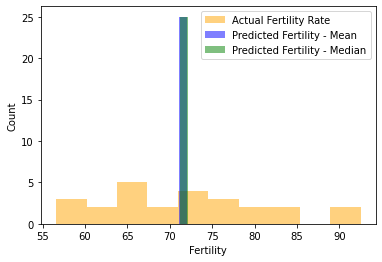

In [17]:
#visualize
plt.hist(y_train.Fertility, color='orange', alpha=.5, label="Actual Fertility Rate")
plt.hist(y_train.fertility_pred_mean, bins=1, color='blue', alpha=.5, rwidth=100, label="Predicted Fertility - Mean")
plt.hist(y_train.fertility_pred_median, bins=1, color='green', alpha=.5, rwidth=100, label="Predicted Fertility - Median")
plt.xlabel("Fertility")
plt.ylabel("Count")
plt.legend()
plt.show()

In [18]:
#create model object
lm = LinearRegression(normalize=True)

#fit the model to our training data, specify column since it is a dataframe
lm.fit(X_train_scaled,y_train.Fertility)

#predict train
y_train['fertility_pred_lm'] = lm.predict(X_train)

#evaluate the RMSE for train
rmse_train = mean_squared_error(y_train.Fertility, y_train.fertility_pred_lm)**(1/2)

#predict validate
y_validate['fertility_pred_lm'] = lm.predict(X_validate)

#evaluate the RMSE for validate
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.fertility_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)
                                                           

RMSE for OLS using LinearRegression
Training/In-Sample:  615.3022285442719 
Validation/Out-of-Sample:  628.5498170704735


In [19]:
#create model object
lars = LassoLars(alpha=1.0)

#fit the model, be sure to specify y_train column since it is a dataframe
lars.fit(X_train_scaled,y_train.Fertility)

#predict train
y_train['fertility_pred_lars'] = lars.predict(X_train)

#evaluate rmse for train
rmse_train = mean_squared_error(y_train.Fertility, y_train.fertility_pred_lars)**(1/2)

#predict_validate
y_validate['fertility_pred_lars'] = lars.predict(X_validate)

#evaluate rmse for validate
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.fertility_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Lasso + Lars
Training/In-Sample:  190.59126185120388 
Validation/Out-of-Sample:  124.32119824359873


In [20]:
#create model object
glm = TweedieRegressor(power=1, alpha=0)

#fit the model, specify y_train column cause it's a dataframe
glm.fit(X_train_scaled,y_train.Fertility)

# predict train
y_train['fertility_pred_glm'] = glm.predict(X_train_scaled)

# evaluate rmse for train
rmse_train = mean_squared_error(y_train.Fertility, y_train.fertility_pred_glm)**(1/2)

# predict validate
y_validate['fertility_pred_glm'] = glm.predict(X_validate)

# evaluate: rmse
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.fertility_pred_glm)**(1/2)

print("RMSE for GLM using Tweedie, power=1 & alpha=0\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for GLM using Tweedie, power=1 & alpha=0
Training/In-Sample:  4.480345159948017 
Validation/Out-of-Sample:  65.87451250065743


In [22]:
#making polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

#fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

#transform X_validate_scaled, and X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)


In [23]:
#okay let's do linear regression again
lm2 = LinearRegression(normalize=True)

#fit the model using scaled X_train, once again specify y_train column
lm2.fit(X_train_degree2, y_train.Fertility)

#predict train
y_train['fertility_pred_lm2'] = lm2.predict(X_train_degree2)

#evaluate rmse for train
rmse_train = mean_squared_error(y_train.Fertility, y_train.fertility_pred_lm2)**(1/2)

#predict validate
y_validate['fertility_pred_lm2'] = lm2.predict(X_validate_degree2)

#evaluate rmse for validate
rmse_validate = mean_squared_error(y_validate.Fertility, y_validate.fertility_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)


RMSE for Polynomial Model, degrees=2
Training/In-Sample:  2.5893942606683207 
Validation/Out-of-Sample:  26.657466827351996


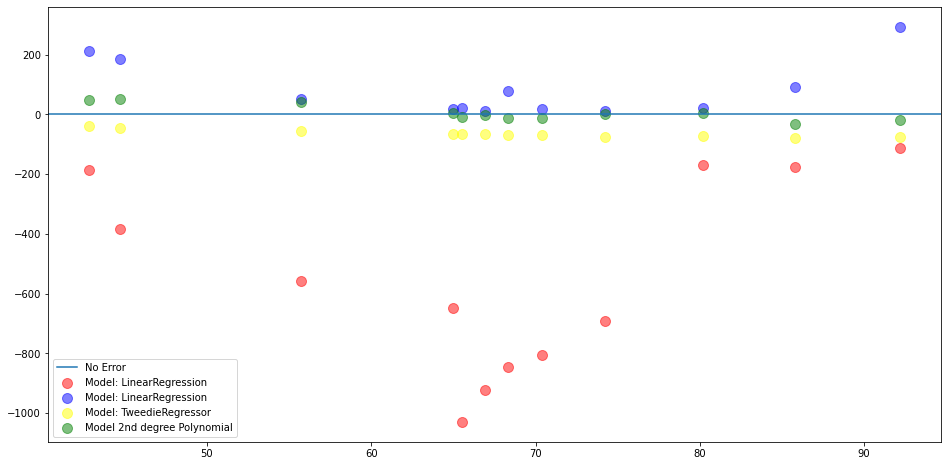

In [24]:
plt.figure(figsize=(16,8))
plt.axhline(label="No Error")
plt.scatter(y_validate.Fertility, y_validate.fertility_pred_lm-y_validate.Fertility, 
            alpha=.5, color="red", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.Fertility, y_validate.fertility_pred_lars-y_validate.Fertility, 
            alpha=.5, color="blue", s=100, label="Model: LinearRegression")
plt.scatter(y_validate.Fertility, y_validate.fertility_pred_glm-y_validate.Fertility, 
            alpha=.5, color="yellow", s=100, label="Model: TweedieRegressor")
plt.scatter(y_validate.Fertility, y_validate.fertility_pred_lm2-y_validate.Fertility, 
            alpha=.5, color="green", s=100, label="Model 2nd degree Polynomial")
plt.legend()

In [26]:
#turning it into a dataframe
y_test = pd.DataFrame(y_test)

# predicting on our test model
y_test['fertility_pred_lm2'] = lm2.predict(X_test_degree2)

# evaluate: rmse
rmse_test = mean_squared_error(y_test.Fertility, y_test.fertility_pred_lm2)**(1/2)

print("RMSE for OLS Model using LinearRegression (2 degrees)\nOut-of-Sample Performance: ", rmse_test)

RMSE for OLS Model using LinearRegression (2 degrees)
Out-of-Sample Performance:  59.76633014508012
